In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from data.csv file
df = pd.read_csv('Dummy_Month.csv')
df.head()

,Unnamed: 0,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1,1002,Present,0,0,Wednesday,2021-08-04
2,2,1003,Present,0,0,Wednesday,2021-08-04
3,3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,4,1005,Present,0,0,Wednesday,2021-08-04


In [3]:
#The amount of observations (rows) and characteristics(columns) in a dataset
print ('The Total Rows in the dataset = ' + str(df.shape[0]))
print ('The Total Columns in the dataset = ' + str(df.shape[1]))

The Total Rows in the dataset = 13440
The Total Columns in the dataset = 7


In [4]:
Bay_ID = (df['Bay_id'] == 1001)
Multiple_Bay_ID = (df['Bay_id'].isin([1001, 1003, 1005]))
All_Bay_ID = (df['Bay_id'].isin([1001, 1002, 1003, 1004, 1005]))
Parking_Status = (df['Status'] == 'Present')
Day_Of_Week = (df['DayOfWeek'] == 'Wednesday')
Date = (df['Date'] == '2021-08-12')
Hour = (df['Hour'] == 11)

In [5]:
CountStatus = df.loc[Bay_ID & Parking_Status].groupby('Status').DayOfWeek.value_counts().unstack(0)
CountStatus = CountStatus.reset_index()
CountStatus['Present'] = (CountStatus['Present'] / 4).round(0)
CountStatus

Status,DayOfWeek,Present
0,Friday,46.0
1,Monday,52.0
2,Saturday,42.0
3,Sunday,43.0
4,Thursday,50.0
5,Tuesday,53.0
6,Wednesday,47.0


In [6]:
ThursdayCount = df.loc[Bay_ID & Parking_Status & Date].groupby('Status').DayOfWeek.value_counts().unstack(0)
ThursdayCount = ThursdayCount.reset_index()
ThursdayCount

Status,DayOfWeek,Present
0,Thursday,46


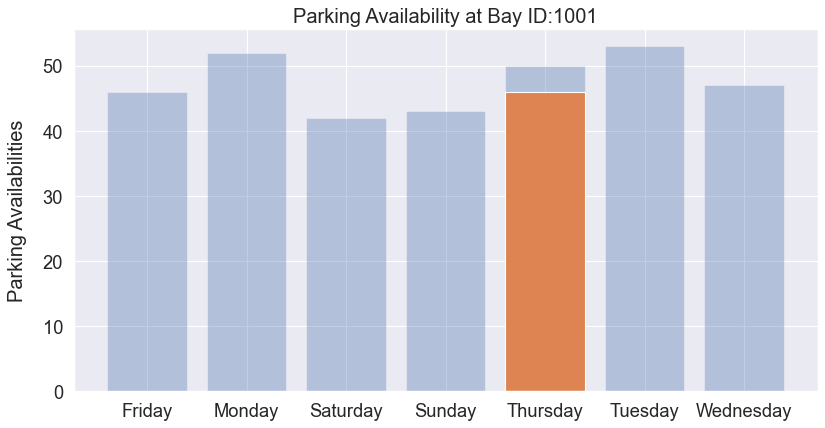

In [24]:
sns.set(font_scale=1.5)
figure(figsize=(12, 6), dpi=80)

plt.ylabel("Parking Availabilities", labelpad=14)
plt.title("Parking Availability at Bay ID:1001", y=1)

plt.bar(CountStatus['DayOfWeek'], CountStatus['Present'],alpha=0.35)
plt.bar(ThursdayCount['DayOfWeek'], ThursdayCount['Present'])

plt.show()